In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras import Sequential
from keras.callbacks import TensorBoard
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

C:\Users\helen.silva\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
X = df.loc[:, df.columns != 'Customer_Segment'].values
y = df.loc[:, df.columns == 'Customer_Segment'].values

In [6]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

enc = OneHotEncoder()
y = enc.fit_transform(y)

In [9]:
n_features, n_classes = X.shape[1], y.shape[1]

n_features, n_classes

(13, 3)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
cb = TensorBoard()

model = Sequential()
model.add(Dense(8, input_dim=n_features, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# fit model
history_callback = model.fit(X_train, Y_train,
                             batch_size=2,
                             epochs=50,
                             verbose=1,
                             validation_data=(X_test, Y_test),
                             callbacks=[cb])

Train on 142 samples, validate on 36 samples
Epoch 1/50
142/142 [==============================] - 0s 2ms/step - loss: 0.9853 - acc: 0.4789 - val_loss: 0.9600 - val_acc: 0.4444
Epoch 2/50
142/142 [==============================] - 0s 663us/step - loss: 0.9312 - acc: 0.5493 - val_loss: 0.9064 - val_acc: 0.6389
Epoch 3/50
142/142 [==============================] - 0s 713us/step - loss: 0.8778 - acc: 0.6831 - val_loss: 0.8527 - val_acc: 0.7222
Epoch 4/50
142/142 [==============================] - 0s 1ms/step - loss: 0.8242 - acc: 0.7535 - val_loss: 0.7979 - val_acc: 0.8056
Epoch 5/50
142/142 [==============================] - 0s 761us/step - loss: 0.7709 - acc: 0.8310 - val_loss: 0.7430 - val_acc: 0.8889
Epoch 6/50
142/142 [==============================] - 0s 663us/step - loss: 0.7193 - acc: 0.8592 - val_loss: 0.6884 - val_acc: 0.9444
Epoch 7/50
142/142 [==============================] - 0s 688us/step - loss: 0.6678 - acc: 0.8873 - val_loss: 0.6342 - val_acc: 0.9722
Epoch 8/50
142/142 [=

In [13]:
Y_pred = model.predict(X_test)

Y_pred

array([[1.7435204e-02, 1.3013763e-02, 5.9174269e-01],
       [9.2043250e-04, 3.6719751e-01, 1.9881593e-03],
       [6.8422389e-01, 7.6457369e-03, 4.4610570e-03],
       [5.8793072e-03, 4.2034617e-01, 1.1799634e-03],
       [7.1875536e-01, 6.7728488e-03, 7.5538331e-03],
       [8.2820049e-03, 2.1949349e-02, 5.1946783e-01],
       [1.7490924e-03, 2.5440949e-01, 3.9777183e-03],
       [7.2614223e-01, 6.1379964e-03, 4.2708614e-03],
       [8.3261617e-03, 2.3722233e-02, 6.3210446e-01],
       [8.8139239e-04, 2.9072559e-01, 4.8662559e-03],
       [6.8346620e-01, 7.0031122e-03, 4.5435899e-03],
       [3.1319848e-01, 2.3963479e-02, 4.8559010e-03],
       [8.2710205e-04, 3.6767745e-01, 1.9957675e-03],
       [7.1412021e-01, 6.4828373e-03, 4.0906412e-03],
       [2.2756292e-03, 3.3620128e-01, 1.8761096e-03],
       [7.5293257e-04, 3.6740956e-01, 2.2093630e-03],
       [9.8438412e-03, 1.8630007e-02, 6.4479798e-01],
       [4.5270416e-01, 1.5626168e-02, 2.2624312e-03],
       [7.8091316e-04, 3.444

In [14]:
matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), [0, 1, 2])

In [15]:
matrix

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1)

print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

36/36 [==============================] - 0s 333us/step
Test Loss:  0.04513578965432114
Test Accuracy:  1.0


In [17]:
cm_sum = np.sum(matrix, axis=1, keepdims=True)
cm_perc = matrix / cm_sum.astype(float) * 100
annot = np.empty_like(matrix).astype(str)
nrows, ncols = matrix.shape

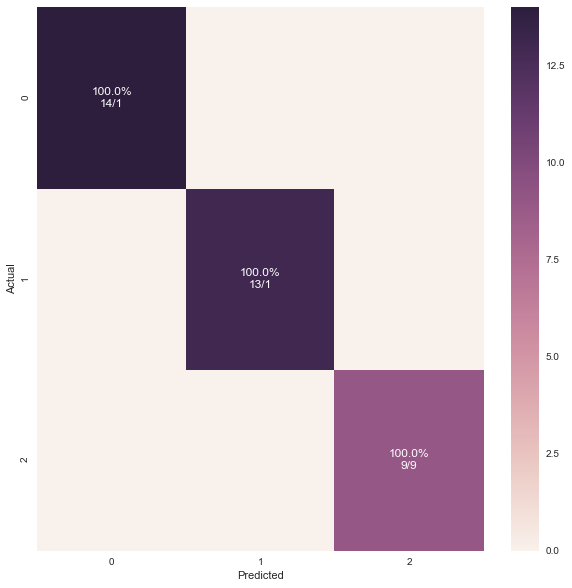

In [18]:
for i in range(nrows):
    for j in range(ncols):
        c = matrix[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

matrix = pd.DataFrame(matrix, index=[0, 1, 2], columns=[0, 1, 2])
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=annot, fmt='', ax=ax)

plt.show()

C:\Users\helen.silva\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


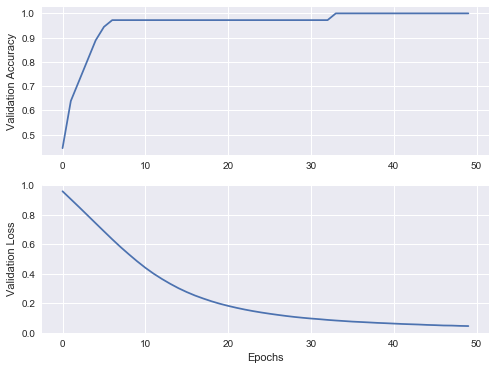

In [19]:
history = [history_callback, model]

fig, (plt1, plt2) = plt.subplots(2, figsize=(8, 6))
val_acc = history[0].history['val_acc']
val_loss = history[0].history['val_loss']

plt1.plot(val_acc)
plt1.set_ylabel('Validation Accuracy')
plt1.legend()

plt2.plot(val_loss)
plt2.set_ylabel('Validation Loss')
plt2.set_xlabel('Epochs')

plt2.legend()

plt.show()